In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
FOLDERNAME = 'DP/data/'
if FOLDERNAME is None: FOLDERNAME = input("[!] Enter folder name: ")

os.chdir(f'/content/drive/MyDrive/Colab Notebooks/{FOLDERNAME}')

Mounted at /content/drive


In [2]:
import os
import glob
import nibabel as nib
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
os.listdir()

['VS-1-30',
 'crossmoda2022_training',
 'VS-31-61',
 'VS-62-91',
 'VS-92-112',
 'VS-113-143',
 'VS-239-250',
 'all_structures',
 'VS-144-175',
 'VS-176-205',
 'VS-206-238',
 'wandb']

In [4]:
t1_list = sorted(glob.glob('VS-*/vs_*/*_t1_*'))
t2_list = sorted(glob.glob('VS-*/vs_*/*_t2_*'))
seg_list = sorted(glob.glob('VS-*/vs_*/*_seg_*'))

In [5]:
print(len(t1_list), len(t2_list), len(seg_list))

print(t1_list[:10])
print(t2_list[:10])
print(seg_list[:10])

252 252 252
['VS-1-30/vs_gk_1/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_10/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_11/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_12/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_13/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_14/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_15/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_16/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_17/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_18/vs_gk_t1_refT2.nii.gz']
['VS-1-30/vs_gk_1/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_10/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_11/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_12/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_13/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_14/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_15/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_16/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_17/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_18/vs_gk_t2_refT2.nii.gz']
['VS-1-30/vs_gk_1/vs_gk_seg_refT2.nii.gz', 'VS-1-30/vs_gk_10/vs_gk_seg_refT2.nii.gz', 'VS-1-30/vs_gk_11/vs_gk_seg_refT2.nii.gz', 'VS-1-30/vs_gk_12/v

In [6]:
t1_train, t1_val, t2_train, t2_val, seg_train, seg_val = train_test_split(t1_list, t2_list, seg_list, test_size=0.3, train_size=0.7, random_state=420)

In [7]:
print(len(t1_train), len(t2_train), len(seg_train))
print(len(t1_val), len(t2_val), len(seg_val))

print(t1_train[:10])
print(t2_train[:10])
print(seg_train[:10])
print()
print(t1_val[:10])
print(t2_val[:10])
print(seg_val[:10])

176 176 176
76 76 76
['VS-176-205/vs_gk_188/vs_gk_t1_refT2.nii.gz', 'VS-144-175/vs_gk_154/vs_gk_t1_refT2.nii.gz', 'VS-206-238/vs_gk_218/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_21/vs_gk_t1_refT2.nii.gz', 'VS-113-143/vs_gk_139/vs_gk_t1_refT2.nii.gz', 'VS-113-143/vs_gk_138/vs_gk_t1_refT2.nii.gz', 'VS-176-205/vs_gk_198/vs_gk_t1_refT2.nii.gz', 'VS-1-30/vs_gk_7/vs_gk_t1_refT2.nii.gz', 'VS-206-238/vs_gk_233/vs_gk_t1_refT2.nii.gz', 'VS-31-61/vs_gk_43/vs_gk_t1_refT2.nii.gz']
['VS-176-205/vs_gk_188/vs_gk_t2_refT2.nii.gz', 'VS-144-175/vs_gk_154/vs_gk_t2_refT2.nii.gz', 'VS-206-238/vs_gk_218/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_21/vs_gk_t2_refT2.nii.gz', 'VS-113-143/vs_gk_139/vs_gk_t2_refT2.nii.gz', 'VS-113-143/vs_gk_138/vs_gk_t2_refT2.nii.gz', 'VS-176-205/vs_gk_198/vs_gk_t2_refT2.nii.gz', 'VS-1-30/vs_gk_7/vs_gk_t2_refT2.nii.gz', 'VS-206-238/vs_gk_233/vs_gk_t2_refT2.nii.gz', 'VS-31-61/vs_gk_43/vs_gk_t2_refT2.nii.gz']
['VS-176-205/vs_gk_188/vs_gk_seg_refT2.nii.gz', 'VS-144-175/vs_gk_154/vs_gk_seg_r

### Missing slices

#### 80

In [ ]:
path_source = 'VS-92-112/vs_gk_112/'
print(os.listdir(path_source))

t1_80 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2_80 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label_80 = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1_80.shape)
print(t2_80.shape)
print(label_80.shape, np.unique(label_80))

['vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz', 'vs_gk_t2_refT2.nii.gz']
(448, 448, 80)
(448, 448, 80)
(448, 448, 80) [0. 1.]


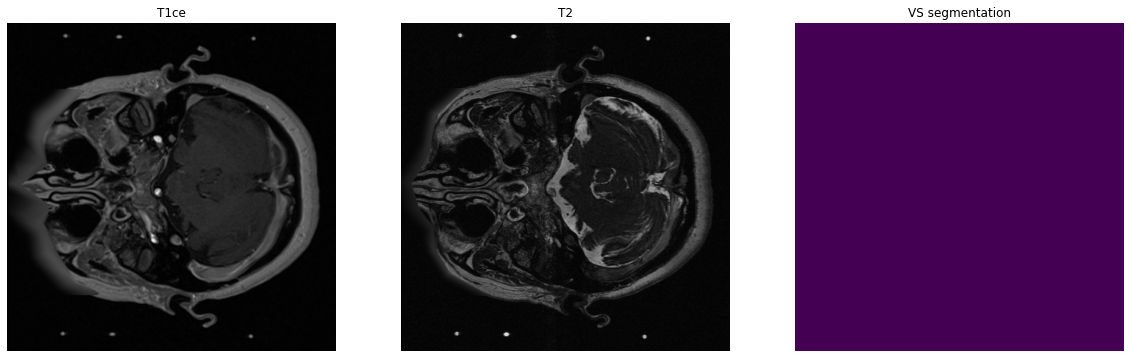

In [ ]:
slice = 35

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1_80[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2_80[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label_80[:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

#### 20

In [ ]:
path_source = 'VS-113-143/vs_gk_131/'
print(os.listdir(path_source))

t1_20 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2_20 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label_20 = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1_20.shape)
print(t2_20.shape)
print(label_20.shape, np.unique(label_20))

['vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz', 'vs_gk_t2_refT2.nii.gz']
(384, 384, 20)
(384, 384, 20)
(384, 384, 20) [0. 1.]


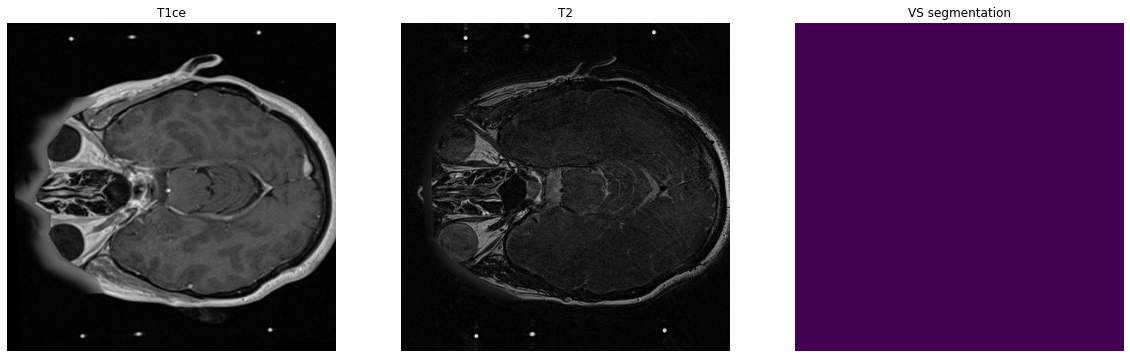

In [ ]:
slice = 19

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1_20[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2_20[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label_20[:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

#### 40

In [ ]:
path_source = 'VS-92-112/vs_gk_108/'
print(os.listdir(path_source))

t1_40 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2_40 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label_40 = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1_40.shape)
print(t2_40.shape)
print(label_40.shape, np.unique(label_40))

['vs_gk_seg_refT2.nii.gz', 'vs_gk_t2_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz']
(384, 384, 40)
(384, 384, 40)
(384, 384, 40) [0. 1.]


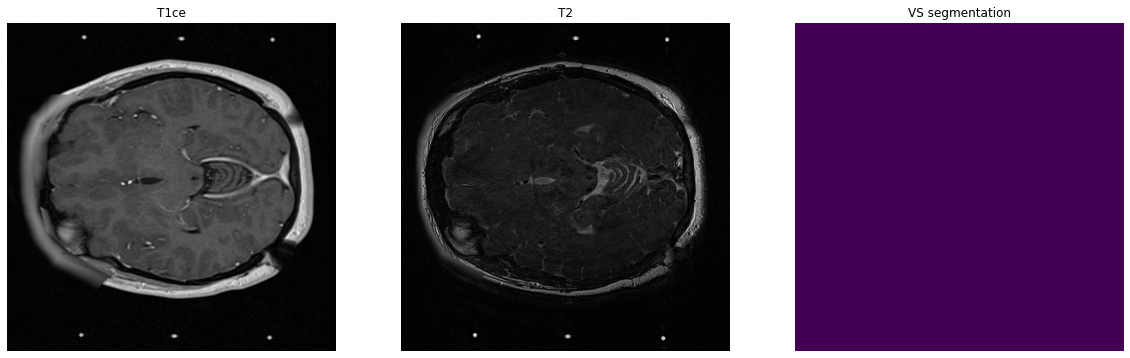

In [ ]:
slice = 39

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1_40[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2_40[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label_40[:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

#### 70

In [ ]:
path_source = 'VS-113-143/vs_gk_115/'
print(os.listdir(path_source))

t1_70 = nib.load(path_source +'vs_gk_t1_refT2.nii.gz').get_fdata()
t2_70 = nib.load(path_source +'vs_gk_t2_refT2.nii.gz').get_fdata()
label_70 = nib.load(path_source +'vs_gk_seg_refT2.nii.gz').get_fdata()
print(t1_70.shape)
print(t2_70.shape)
print(label_70.shape, np.unique(label_70))

['vs_gk_seg_refT2.nii.gz', 'vs_gk_t1_refT2.nii.gz', 'vs_gk_t2_refT2.nii.gz']
(448, 448, 70)
(448, 448, 70)
(448, 448, 70) [0. 1.]


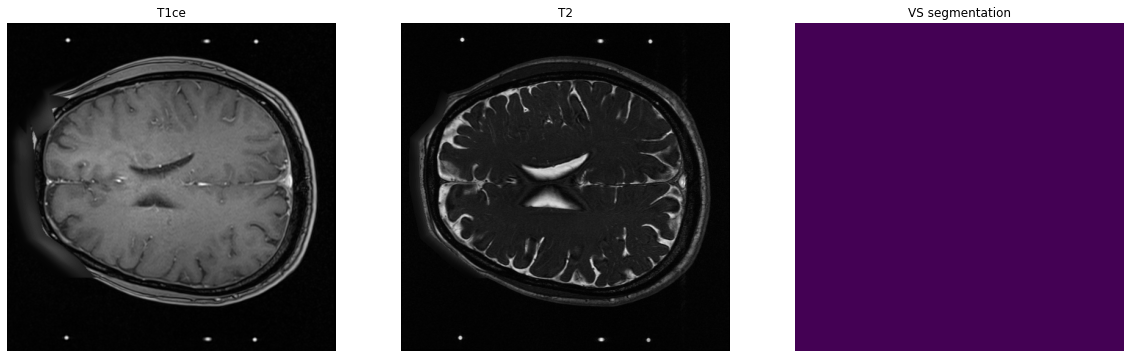

In [ ]:
slice = 65

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(t1_70[:,:,slice], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(t2_70[:,:,slice], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(label_70[:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

#### Finding volumes with missing values

In [ ]:
n = 0
l = {}
for t1 in t1_list:
  i = nib.load(t1).get_fdata()
  if i[0,0,:].shape != (80,):
    n += 1
    l[t1] = i.shape
    print(n, t1, i.shape)

1 VS-1-30/vs_gk_3/vs_gk_t1_refT2.nii.gz (384, 384, 40)
2 VS-62-91/vs_gk_90/vs_gk_t1_refT2.nii.gz (384, 384, 40)
3 VS-62-91/vs_gk_91/vs_gk_t1_refT2.nii.gz (384, 384, 40)
4 VS-92-112/vs_gk_108/vs_gk_t1_refT2.nii.gz (384, 384, 40)
5 VS-92-112/vs_gk_113/vs_gk_t1_refT2.nii.gz (384, 384, 40)
6 VS-92-112/vs_gk_115/vs_gk_t1_refT2.nii.gz (448, 448, 70)
7 VS-92-112/vs_gk_114/vs_gk_t1_refT2.nii.gz (384, 384, 40)
8 VS-92-112/vs_gk_122/vs_gk_t1_refT2.nii.gz (384, 384, 40)
9 VS-92-112/vs_gk_106/vs_gk_t1_refT2.nii.gz (384, 384, 40)
10 VS-92-112/vs_gk_120/vs_gk_t1_refT2.nii.gz (384, 384, 40)
11 VS-92-112/vs_gk_109/vs_gk_t1_refT2.nii.gz (384, 384, 40)
12 VS-92-112/vs_gk_121/vs_gk_t1_refT2.nii.gz (384, 384, 40)
13 VS-92-112/vs_gk_119/vs_gk_t1_refT2.nii.gz (384, 384, 40)
14 VS-92-112/vs_gk_101/vs_gk_t1_refT2.nii.gz (384, 384, 40)
15 VS-92-112/vs_gk_100/vs_gk_t1_refT2.nii.gz (384, 384, 40)
16 VS-92-112/vs_gk_110/vs_gk_t1_refT2.nii.gz (384, 384, 40)
17 VS-92-112/vs_gk_107/vs_gk_t1_refT2.nii.gz (384, 384, 4

In [ ]:
n

58

### Generator

In [8]:
import cv2
from matplotlib import image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import nibabel as nib
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import albumentations as A
import random

In [9]:
class DataGen(tf.keras.utils.Sequence):
    def __init__(self, t1ce_list, t2_list, mask_list, img_dim=(256, 256, 60),
                 img_channels=2, classes=1, batch_size=2, aug=False):
        self.batch_size = batch_size
        self.classes = classes
        self.img_channels = img_channels
        self.img_dim = img_dim
        self.t1ce_list = t1ce_list
        self.t2_list = t2_list
        self.mask_list = mask_list
        self.aug = aug

        self.start_indices = {
            20: 35,
            40: 25,
            70: 5,
            80: 0
        }

    def __len__(self):
        return len(self.t1ce_list) // self.batch_size

    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_t1ce = self.t1ce_list[i: i + self.batch_size]
        batch_t2 = self.t2_list[i: i + self.batch_size]
        batch_mask = self.mask_list[i: i + self.batch_size]

        X, y = self.__data_generation(t1ce_list=batch_t1ce, t2_list=batch_t2, mask_list=batch_mask)

        return X, y

    # based on https://stackoverflow.com/a/44007180
    def __get_dimensions(self, img, scale=.6):
        center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
        width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
        left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
        top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
        return int(left_x), int(right_x), int(top_y), int(bottom_y)

    def __normalise(self, image):
        scaler = MinMaxScaler()
        image = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        return image

    def __add_missing_slices(self, image, start):
      tmp = np.zeros((image.shape[0], image.shape[1], start))
      image = np.append(tmp, image, axis=2)      
      # print(np.unique(image[:,:,59]))
      return image


    def __data_generation(self, t1ce_list, t2_list, mask_list):
        images = []
        masks = []
        for t1ce_name, t2_name, mask_name in zip(t1ce_list, t2_list, mask_list):
            t1ce = nib.load(t1ce_name).get_fdata()
            t2 = nib.load(t2_name).get_fdata()
            mask = nib.load(mask_name).get_fdata()

            # crop the images and mask
            left_x, right_x, top_y, bottom_y = self.__get_dimensions(t1ce[:, :, 0])
            t1ce = t1ce[left_x:right_x, top_y:bottom_y, :]
            t2 = t2[left_x:right_x, top_y:bottom_y, :]
            mask = mask[left_x:right_x, top_y:bottom_y, :]

            volume_start = 0
            total_slices = t1ce.shape[2]
            tmp_t1ce = np.zeros((self.img_dim[0], self.img_dim[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))
            tmp_t2 = np.zeros((self.img_dim[0], self.img_dim[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))
            tmp_mask = np.zeros((self.img_dim[0], self.img_dim[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))

            # tmp_t1ce = np.zeros((t1ce.shape[0], t1ce.shape[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))
            # tmp_t2 = np.zeros((t1ce.shape[0], t1ce.shape[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))
            # tmp_mask = np.zeros((t1ce.shape[0], t1ce.shape[1], self.img_dim[2]-self.start_indices[t1ce.shape[2]]))

            # resize the images and mask
            inter = cv2.INTER_NEAREST
            for i in range(total_slices):
                tmp_t1ce[:, :, i] = cv2.resize(t1ce[:, :, i + volume_start], self.img_dim[:2], interpolation=inter)
                tmp_t2[:, :, i] = cv2.resize(t2[:, :, i + volume_start], self.img_dim[:2], interpolation=inter)
                tmp_mask[:, :, i] = cv2.resize(mask[:, :, i + volume_start], self.img_dim[:2], interpolation=inter)

                # tmp_t1ce[:, :, i] = cv2.resize(t1ce[:, :, i + volume_start], tmp_t1ce.shape[:2], interpolation=inter)
                # tmp_t2[:, :, i] = cv2.resize(t2[:, :, i + volume_start], tmp_t1ce.shape[:2], interpolation=inter)
                # tmp_mask[:, :, i] = cv2.resize(mask[:, :, i + volume_start], tmp_t1ce.shape[:2], interpolation=inter)
            
            if t1ce.shape[2] in [20, 40, 70]:
                t1ce = self.__add_missing_slices(tmp_t1ce, self.start_indices[t1ce.shape[2]])
                t2 = self.__add_missing_slices(tmp_t2, self.start_indices[t2.shape[2]])
                mask = self.__add_missing_slices(tmp_mask, self.start_indices[mask.shape[2]])
            else:
                t1ce = tmp_t1ce
                t2 = tmp_t2
                mask = tmp_mask

            # ==================== Sequences ==================== #
            # normalise
            t1ce = self.__normalise(t1ce)
            t2 = self.__normalise(t2)

            # stack the sequences
            if self.img_channels == 2:
                image = np.stack([t1ce, t2], axis=3)
            else:
                image = np.stack([t1ce], axis=3)

            # encode
            if self.classes == 1:
                mask = tf.one_hot(mask, 1, on_value=0, off_value=1)
            # mask = mask.astype(np.uint8)

            images.append(image)
            masks.append(mask)

        images = np.array(images)
        masks = np.array(masks)

        # return images/np.max(images), masks
        return images, masks

#### Testing

In [ ]:
data_gen_40 = DataGen(
  t1ce_list=['VS-92-112/vs_gk_108/vs_gk_t1_refT2.nii.gz'], 
  t2_list=['VS-92-112/vs_gk_108/vs_gk_t2_refT2.nii.gz'], 
  mask_list=['VS-92-112/vs_gk_108/vs_gk_seg_refT2.nii.gz'],
  img_dim=(128, 128, 80), 
  img_channels=2,
  classes=1,
  batch_size=2
)

In [ ]:
img_40, mask_40 = data_gen_40.__getitem__(0)

In [ ]:
print(img_40.shape, mask_40.shape)

(1, 128, 128, 80, 2) (1, 128, 128, 80, 1)


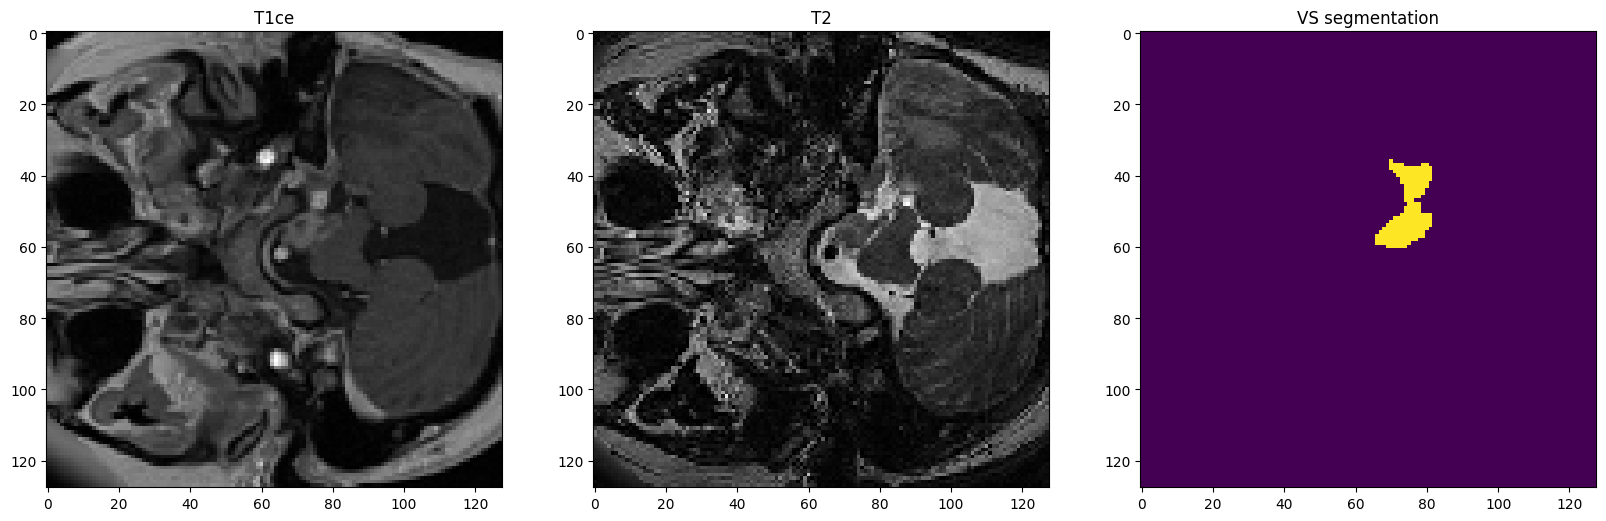

In [ ]:
slice = 40

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(img_40[0,:,:,slice,0], cmap='gray')
# ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(img_40[0,:,:,slice,1], cmap='gray')
# ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(mask_40[0,:,:,slice])
# ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

In [ ]:
data_gen_20 = DataGen(
  t1ce_list=['VS-113-143/vs_gk_131/vs_gk_t1_refT2.nii.gz'], 
  t2_list=['VS-113-143/vs_gk_131/vs_gk_t2_refT2.nii.gz'], 
  mask_list=['VS-113-143/vs_gk_131/vs_gk_seg_refT2.nii.gz'],
  img_dim=(128, 128, 80), 
  img_channels=2,
  classes=1,
  batch_size=2
)
img_20, mask_20 = data_gen_20.__getitem__(0)
print(img_20.shape, mask_20.shape)

(1, 128, 128, 80, 2) (1, 128, 128, 80, 1)


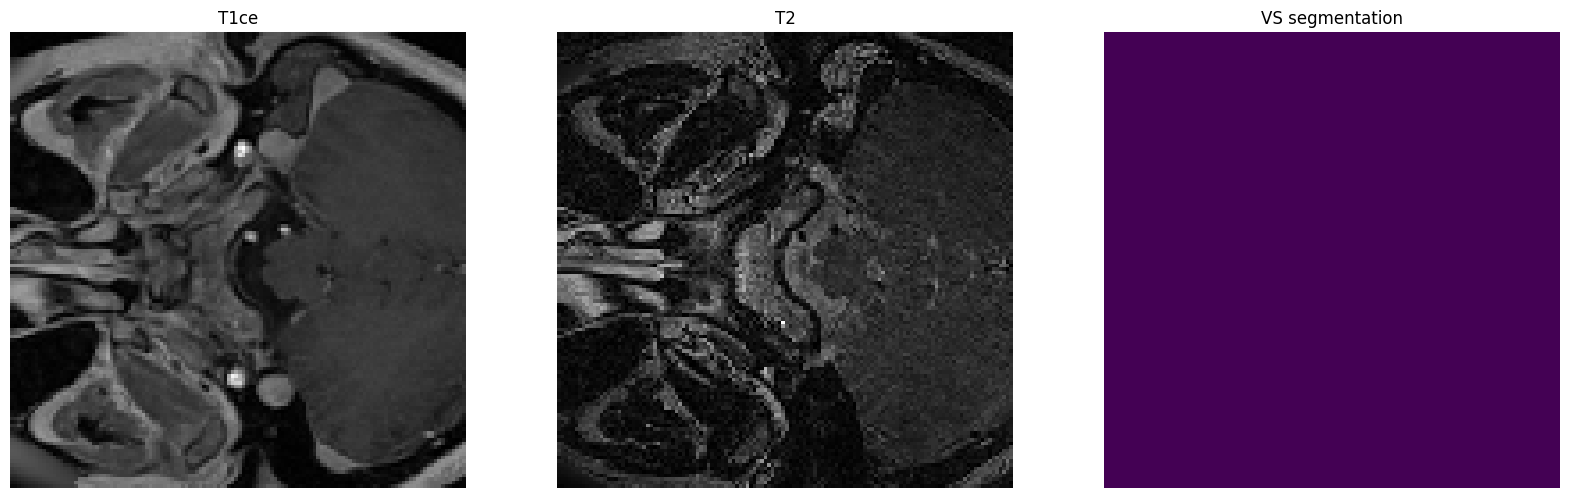

In [ ]:
slice = 35

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(img_20[0,:,:,slice,0], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(img_20[0,:,:,slice,1], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(mask_20[0,:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

In [ ]:
data_gen_70 = DataGen(
  t1ce_list=['VS-113-143/vs_gk_115/vs_gk_t1_refT2.nii.gz'], 
  t2_list=['VS-113-143/vs_gk_115/vs_gk_t2_refT2.nii.gz'], 
  mask_list=['VS-113-143/vs_gk_115/vs_gk_seg_refT2.nii.gz'],
  img_dim=(256, 256, 80), 
  img_channels=2,
  classes=1,
  batch_size=2
)
img_70, mask_70 = data_gen_70.__getitem__(0)
print(img_70.shape, mask_70.shape)

(1, 256, 256, 80, 2) (1, 256, 256, 80, 1)


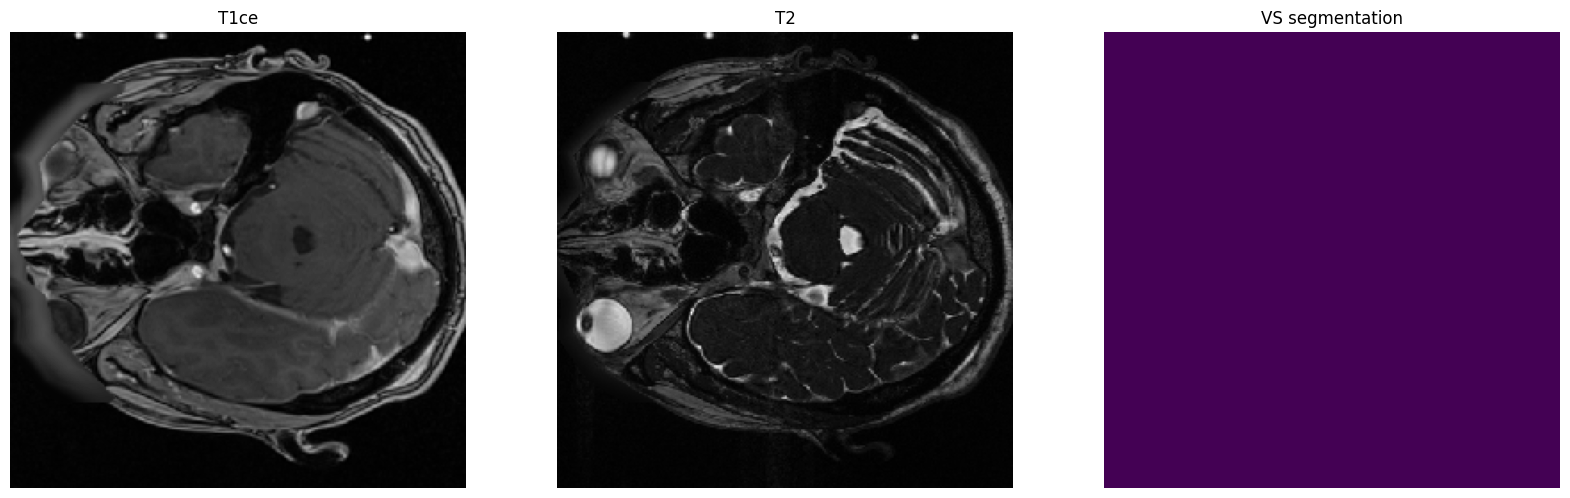

In [ ]:
slice = 35

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(img_70[0,:,:,slice,0], cmap='gray')
ax1.axis('off')
ax1.set_title('T1ce')
ax2.imshow(img_70[0,:,:,slice,1], cmap='gray')
ax2.axis('off')
ax2.set_title('T2')
ax3.imshow(mask_70[0,:,:,slice])
ax3.axis('off')
ax3.set_title('VS segmentation')
plt.show()

## Union over masks

384, 448

In [ ]:
data_gen = DataGen(
  t1ce_list=t1_list, 
  t2_list=t2_list, 
  mask_list=seg_list,
  img_dim=(128, 128, 80), 
  img_channels=1,
  classes=1,
  batch_size=1
)

In [ ]:
x, mask = data_gen.__getitem__(0)
x.shape

(1, 256, 256, 80, 1)

In [ ]:
masks_combined = np.zeros((128, 128, 80))
masks_combined.shape

(128, 128, 80)

In [ ]:
i = 0
for (_, mask) in data_gen:
  mask = mask[0, :, :, :, 0]
  masks_combined += mask
  i += 1
  if i%10==0: print(i)
i

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250


252

In [ ]:
np.save('masks_combined.npy', masks_combined)
# d = np.load('masks_combined.npy')

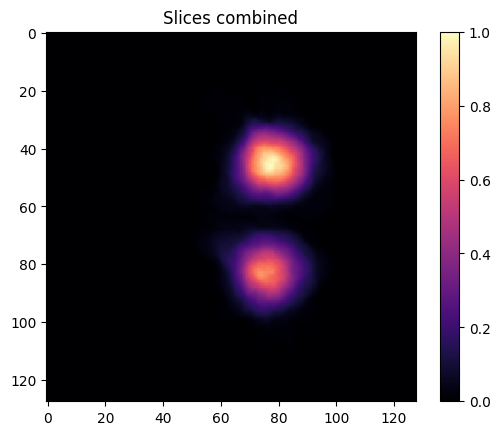

In [ ]:
summed = np.sum(masks_combined, axis=2)
a = summed / summed.max()

plt.imshow(a, cmap='magma')
plt.title('Slices combined')
cb = plt.colorbar()
plt.show()

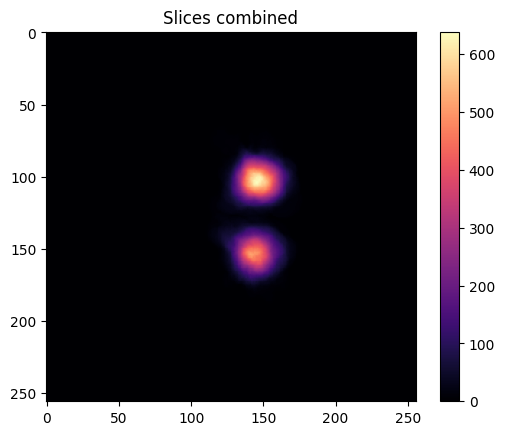

In [ ]:
a = np.sum(masks_combined, axis=2)
a = a / a.max()

plt.imshow(a, cmap='magma')
plt.title('Slices combined')
cb = plt.colorbar()
plt.savefig(f'outputs/slices_combined.png')

In [ ]:
for slice in range(masks_combined.shape[2]):
  plt.imshow(masks_combined[:, :, slice], cmap='magma')
  plt.colorbar()
  plt.title(f'Slice {slice}')
  plt.savefig(f'outputs/slices_{slice}.png')
  plt.close()

In [ ]:
import copy

In [ ]:
masks_combined2 = copy.deepcopy(masks_combined)
masks_combined2 = masks_combined2 / summed.max()

In [ ]:
for slice in range(masks_combined2.shape[2]):
  plt.imshow(masks_combined2[:, :, slice], cmap='magma')
  plt.colorbar()
  plt.title(f'Slice {slice}')
  plt.savefig(f'outputs/slices_{slice}.png')
  plt.close()

### Graphs

In [ ]:
import plotly.graph_objects as go

In [ ]:
mask = mask[0, :, :, :, 0] 

# Training

## Model

In [37]:
import keras.backend as K


def dice_coef_binary(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f) + K.sum(y_pred_f))

def dice_coef2(y_true, y_pred, epsilon=1e-6):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    axis = (0, 1)
    # axis = (0, 1, 2, 3)
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true * y_true, axis=axis) + K.sum(y_pred * y_pred, axis=axis) + epsilon
    return K.mean((dice_numerator) / (dice_denominator))

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, Dropout


def downsampling_conv(input, kernel_init, filters):
    conv1 = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(input)
    conv2 = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(conv1)
    output = MaxPooling3D((2, 2, 2))(conv2)

    return conv2, output


def upsampling_conv(input, skip, kernel_init, filters):
    output = Conv3DTranspose(filters, (2, 2, 2), strides=(2, 2, 2), padding='same')(input)
    output = concatenate([output, skip])
    output = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(output)
    output = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(output)

    return output


def bottleneck(input, kernel_init, filters):
    output = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(input)
    output = Conv3D(filters, (3, 3, 3), activation='relu', kernel_initializer=kernel_init, padding='same')(output)

    return output


def unet(img_height, img_width, img_depth, img_channels, num_classes):
    input = Input((img_height, img_width, img_depth, img_channels))
    kernel_init = 'he_uniform'  # he_normal

    # Downsampling path
    skip1, down1 = downsampling_conv(input, kernel_init, filters=16)
    skip2, down2 = downsampling_conv(down1, kernel_init, filters=32)
    skip3, down3 = downsampling_conv(down2, kernel_init, filters=64)
    skip4, down4 = downsampling_conv(down3, kernel_init, filters=128)
    
    # Bottleneck
    out = bottleneck(down4, kernel_init, filters=256)

    # Upsampling path
    up1 = upsampling_conv(out, skip4, kernel_init, filters=128)
    up2 = upsampling_conv(up1, skip3, kernel_init, filters=64)
    up3 = upsampling_conv(up2, skip2, kernel_init, filters=32)
    up4 = upsampling_conv(up3, skip1, kernel_init, filters=16)

    # Outputs
    if num_classes == 1:
        # sigmoid + binary crossentropy (1 class + background)
        output = Conv3D(num_classes, (1, 1, 1), activation='sigmoid')(up4)
        print('using sigmoid')
    else:
        # softmax + categorical crossentropy (2+ classes)
        output = Conv3D(num_classes, (1, 1, 1), activation='softmax')(up4)
        print('using softmax')

    model = Model(inputs=[input], outputs=[output])
    print("input shape: ", model.input_shape)
    print("output shape: ", model.output_shape)

    return model


## Training

In [ ]:
!pip install wandb segmentation-models-3D

import wandb
from wandb.keras import WandbCallback
import segmentation_models_3D as sm

In [21]:
config = {
    "num_classes": 1, # 1, 2, 4
    "img_channels": 1, # 2, 3, 4
    "learning_rate": 1e-4, #1e-3, 1e-4, 1e-5, 1e-6
    "epochs": 50,
    "batch_size": 2, # 2, 4
    "loss": "categorical_crossentropy", # categorical_crossentropy, dice_loss, binary_crossentropy, binary_dice_loss
    "optimizer": "adam",
    "dataset": "DP"
}

In [ ]:
wandb.login(key='a68b79c89593d1f8c50631508f2e618f3ba7ccf3')
wandb.config=config
run = wandb.init(
    project="DP1",
    entity="kuko",
    reinit=True,
    config=config
)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kuko. Use `wandb login --relogin` to force relogin


In [18]:
train_img_datagen = DataGen(
  t1ce_list=t1_train, 
  t2_list=t2_train, 
  mask_list=seg_train,
  img_dim=(128, 128, 80), 
  img_channels=1,
  classes=1,
  batch_size=2
)
img_train, mask_train = train_img_datagen.__getitem__(0)
print(img_train.shape, mask_train.shape)

val_img_datagen = DataGen(
  t1ce_list=t1_val, 
  t2_list=t2_val, 
  mask_list=seg_val,
  img_dim=(128, 128, 80), 
  img_channels=2,
  classes=1,
  batch_size=2
)


(2, 128, 128, 80, 1) (2, 128, 128, 80, 1)


(2, 128, 128, 80, 2) (2, 128, 128, 80, 1)


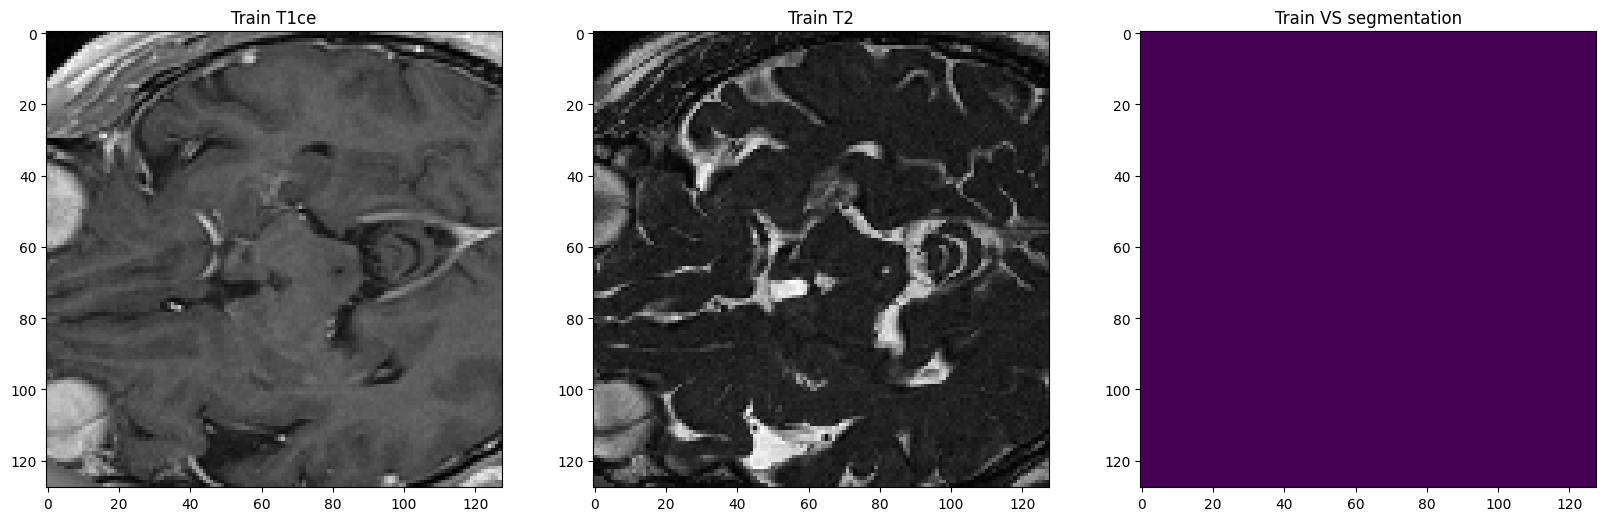

In [16]:
img_train, mask_train = train_img_datagen.__getitem__(1)
print(img_train.shape, mask_train.shape)

slice = 39
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(img_train[0,:,:,slice, 0], cmap='gray')
# ax1.axis('off')
ax1.set_title('Train T1ce')
ax2.imshow(img_train[0,:,:,slice, 1], cmap='gray')
# ax2.axis('off')
ax2.set_title('Train T2')
ax3.imshow(mask_train[0,:,:,slice])
# ax3.axis('off')
ax3.set_title('Train VS segmentation')
plt.show()

(2, 128, 128, 80, 2) (2, 128, 128, 80, 1)


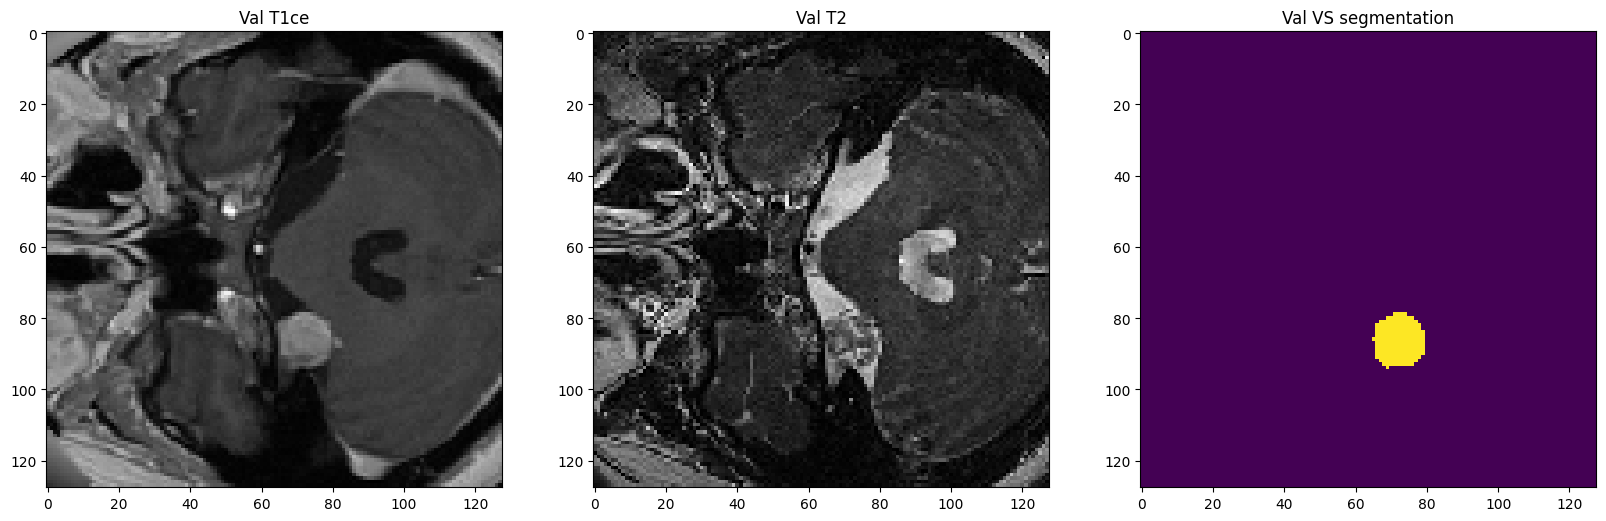

In [17]:
img_val, mask_val = val_img_datagen.__getitem__(0)
print(img_train.shape, mask_train.shape)

slice = 44
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))
ax1.imshow(img_val[0,:,:,slice, 0], cmap='gray')
# ax1.axis('off')
ax1.set_title('Val T1ce')
ax2.imshow(img_val[0,:,:,slice, 1], cmap='gray')
# ax2.axis('off')
ax2.set_title('Val T2')
ax3.imshow(mask_val[0,:,:,slice])
# ax3.axis('off')
ax3.set_title('Val VS segmentation')
plt.show()

In [29]:
f = np.zeros_like(mask_val, dtype=np.int32)

In [33]:
mask_val.shape

(2, 128, 128, 80, 1)

In [34]:
dice_coef_binary(mask_val, mask_val)

TypeError: ignored

In [ ]:
np.unique(mask_val)

array([0, 1], dtype=int32)

In [19]:
batch_size = config["batch_size"]
metrics = [
    sm.metrics.IOUScore(threshold=0.5),
    tf.keras.metrics.MeanIoU(num_classes=1),
    dice_coef_binary, dice_coef2
]

In [22]:
model = unet(
    img_height=128, img_width=128, img_depth=80, 
    img_channels=config["img_channels"], 
    num_classes=config["num_classes"]
)

using sigmoid
input shape:  (None, 128, 128, 80, 1)
output shape:  (None, 128, 128, 80, 1)


In [23]:
steps_per_epoch = len(t1_train) // batch_size
val_steps_per_epoch = len(t1_val) // batch_size

In [35]:
optim = tf.keras.optimizers.Adam(config['learning_rate'])
model.compile(optimizer=optim, loss="binary_crossentropy", metrics=metrics)

In [39]:
history = model.fit(
    train_img_datagen,
    steps_per_epoch=steps_per_epoch,
    epochs=config["epochs"],
    verbose=1,
    # callbacks=[WandbCallback()],
    validation_data=val_img_datagen,
    validation_steps=val_steps_per_epoch
)

Epoch 1/50
11/88 [==>...........................] - ETA: 15:21 - loss: 0.0000e+00 - iou_score: 3.9935e-09 - mean_io_u: 0.4994 - dice_coef_binary: 3.9779e-04 - dice_coef2: 0.9603

KeyboardInterrupt: ignored

In [ ]:
 run.finish()

## Playground

In [ ]:
start = { 80: [], 70: [], 40: [], 20: [] }
end = { 80: [], 70: [], 40: [], 20: [] }
started = False
n = 0
for seg_path in seg_list:
  seg = nib.load(seg_path).get_fdata()
  print(seg_path)
  #if seg.shape[2] != 80: continue
  for i in range(seg.shape[2]):
    if not started and len(np.unique(seg[:,:,i])) == 2:     
      started = True
      start[seg.shape[2]].append(i)
    if started and len(np.unique(seg[:,:,i])) == 1:
      end[seg.shape[2]].append(i)
      started = False
      break
  # break
  print(f'{seg.shape[2]} slices, start: {start[seg.shape[2]][-1]}, end: {end[seg.shape[2]][-1]}')
  print()
  n += 1

VS-1-30/vs_gk_1/vs_gk_seg_refT2.nii.gz
80 slices, start: 16, end: 30

VS-1-30/vs_gk_10/vs_gk_seg_refT2.nii.gz
80 slices, start: 20, end: 39

VS-1-30/vs_gk_11/vs_gk_seg_refT2.nii.gz
80 slices, start: 11, end: 28

VS-1-30/vs_gk_12/vs_gk_seg_refT2.nii.gz
80 slices, start: 14, end: 25

VS-1-30/vs_gk_13/vs_gk_seg_refT2.nii.gz
80 slices, start: 23, end: 29

VS-1-30/vs_gk_14/vs_gk_seg_refT2.nii.gz
80 slices, start: 29, end: 37

VS-1-30/vs_gk_15/vs_gk_seg_refT2.nii.gz
80 slices, start: 26, end: 34

VS-1-30/vs_gk_16/vs_gk_seg_refT2.nii.gz
80 slices, start: 28, end: 35

VS-1-30/vs_gk_17/vs_gk_seg_refT2.nii.gz
80 slices, start: 14, end: 32

VS-1-30/vs_gk_18/vs_gk_seg_refT2.nii.gz
80 slices, start: 19, end: 24

VS-1-30/vs_gk_19/vs_gk_seg_refT2.nii.gz
80 slices, start: 14, end: 33

VS-1-30/vs_gk_2/vs_gk_seg_refT2.nii.gz
80 slices, start: 14, end: 23

VS-1-30/vs_gk_20/vs_gk_seg_refT2.nii.gz
80 slices, start: 31, end: 39

VS-1-30/vs_gk_21/vs_gk_seg_refT2.nii.gz
80 slices, start: 20, end: 33

VS-1-30/

In [ ]:
print(f'mean start for: 80 slices {np.mean(start[80])}, 70 slices {np.mean(start[70])}, 40 slices {np.mean(start[40])}, 20 slices {np.mean(start[20])}')

mean start for: 80 slices 24.061855670103093, 70 slices 18.0, 40 slices 13.981818181818182, 20 slices 6.0


In [ ]:
print(f'mean end for: 80 slices {np.mean(end[80])}, 70 slices {np.mean(end[70])}, 40 slices {np.mean(end[40])}, 20 slices {np.mean(end[20])}')

mean end for: 80 slices 34.603092783505154, 70 slices 27.0, 40 slices 25.29090909090909, 20 slices 15.0
